In [43]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

In [44]:
#Q1. Analyse data structure
# read data from file uploaded on GITHUB
df=pd.read_csv("https://raw.githubusercontent.com/prashant-devops/AI-Algorithm/main/winequality-white.csv")

In [45]:
#Q1 Use head
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [46]:
#Q1 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [47]:
#Q1 Describe
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [48]:
# Print the correlation matrix between quality and the other attributes.
corr_matrix = df.corr()
print("Correlation matrix:\n", corr_matrix["quality"].sort_values(ascending=False))

Correlation matrix:
 quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


In [49]:
#Find the value_counts of the quality attribute.

value_counts = df["quality"].value_counts()
print("Value counts of the 'quality' attribute:\n", value_counts)

Value counts of the 'quality' attribute:
 6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


In [50]:
# Split the data into 80% training set and 20% testing set, and print the shape of X_train, y_train, X_test, and y_test.

from sklearn.model_selection import train_test_split

X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (3918, 11)
Shape of y_train: (3918,)
Shape of X_test: (980, 11)
Shape of y_test: (980,)


In [51]:
# Train a svm model (we will call it model1) to predict the quality of wine on the training set using: kernel = rbf, gamma = 1, and C =1.

from sklearn.svm import SVC

model_1 = SVC(kernel='rbf', gamma=1, C=1)
model_1.fit(X_train, y_train)
print("Accuracy: ",model_1.score(X_test,y_test))

Accuracy:  0.6193877551020408


In [52]:
# Test your model on the test set, and report the classification_report on the y_test and y_predict

from sklearn.metrics import classification_report

y_predict = model_1.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_predict))

Classification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       1.00      0.08      0.15        25
           5       0.92      0.32      0.48       291
           6       0.54      0.98      0.69       432
           7       0.97      0.39      0.56       192
           8       1.00      0.37      0.54        35

    accuracy                           0.62       980
   macro avg       0.74      0.36      0.40       980
weighted avg       0.76      0.62      0.58       980



/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


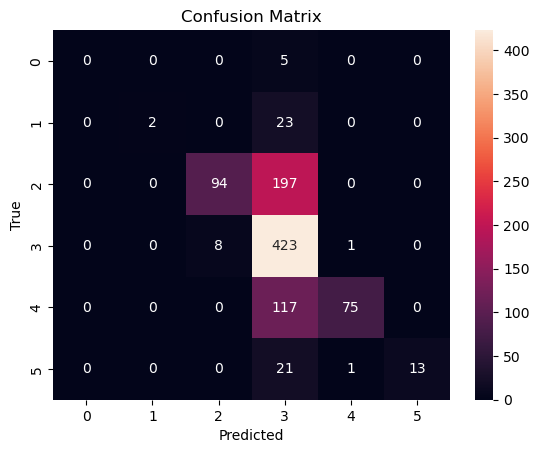

In [53]:
# Plot the confusion matrix of your test results using ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(y_test, y_predict)
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [54]:
# Train a svm model with the same kernel and gamma values but with a smaller value of C (e.g., C=0.01), and only report the classification_report. We
#will refer to this model as model2.

model2 = SVC(kernel='rbf', gamma=1, C=0.01)
model2.fit(X_train, y_train)

y_predict = model2.predict(X_test)
print("Classification report for Model 2:\n", classification_report(y_test, y_predict))

Classification report for Model 2:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00       291
           6       0.44      1.00      0.61       432
           7       0.00      0.00      0.00       192
           8       0.00      0.00      0.00        35

    accuracy                           0.44       980
   macro avg       0.07      0.17      0.10       980
weighted avg       0.19      0.44      0.27       980



/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
# Train a svm model with the same kernel and gamma values but with a larger
# value of C (e.g., C=10), and only report the classification_report. We will refer to this model as model3

model3 = SVC(kernel='rbf', gamma=1, C=10)
model3.fit(X_train, y_train)

y_predict = model3.predict(X_test)
print("Classification report for Model 3:\n", classification_report(y_test, y_predict))


Classification report for Model 3:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       1.00      0.08      0.15        25
           5       0.90      0.35      0.50       291
           6       0.54      0.97      0.70       432
           7       0.95      0.40      0.56       192
           8       1.00      0.40      0.57        35

    accuracy                           0.63       980
   macro avg       0.73      0.37      0.41       980
weighted avg       0.76      0.63      0.59       980



/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# Evaluate model1 using cross validation with cv=5. Report on the cross_val_score, and the mean of the accuracy scores.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_1, X_train, y_train, cv=5)
print("Cross validation scores:", scores)
print("Mean accuracy:", np.mean(scores))


Cross validation scores: [0.60204082 0.60459184 0.58163265 0.58492976 0.60408685]
Mean accuracy: 0.5954563817864311
